# Task 2: Classification of healthy and irregular ECG Data
By using the ECG Heartbeat Categorization Dataset, we performed multiclass classification to diagnose the various ECG recordings.

Download the dataset from the ECG Heartbeat Categorization Dataset: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
Unzip the archive.zip file
Rename the folder archive as ecg_dataset and place it in the root of the git repository

References: ECG Heartbeat Classification: A Deep Transferable Representation: https://arxiv.org/pdf/1805.00794.pdf

MIT-BIH Arrhythmia Dataset
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
The final element of each row denotes the class to which that example belongs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


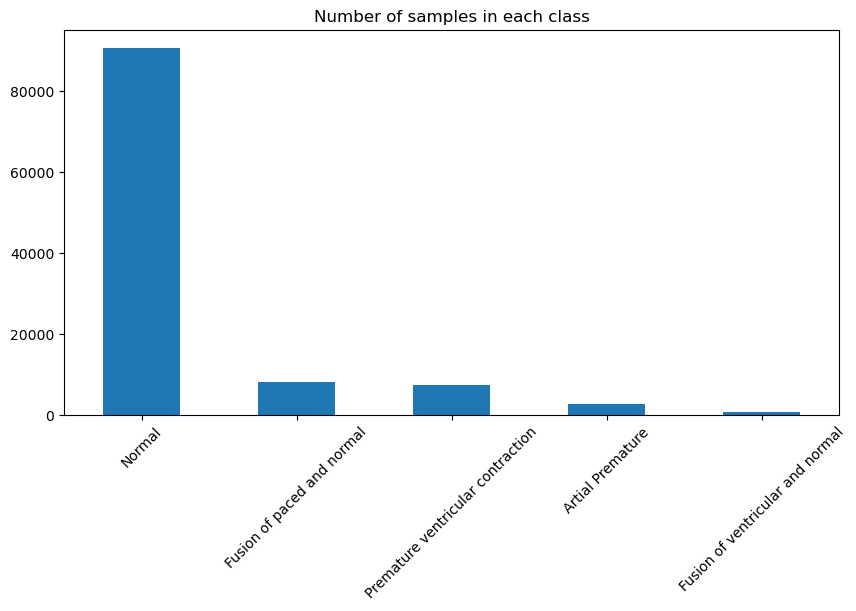

In [2]:
# %% Reading in the data
#df_mitbih_train = pd.read_csv("mitbih_train.csv", header = None)
#df_mitbih_test = pd.read_csv("mitbih_test.csv", header = None)

df_mitbih_train = pd.read_csv('C:/Users/Justin/Documents/LLNL/Data/Task1/ecg_dataset/mitbih_train.csv', header=None)
df_mitbih_test = pd.read_csv('C:/Users/Justin/Documents/LLNL/Data/Task1/ecg_dataset/mitbih_test.csv', header=None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_mitbih["label"].value_counts()
# substitute the class names
counts.index = counts.index.map(id_to_label)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 45)
plt.title("Number of samples in each class")
plt.show()

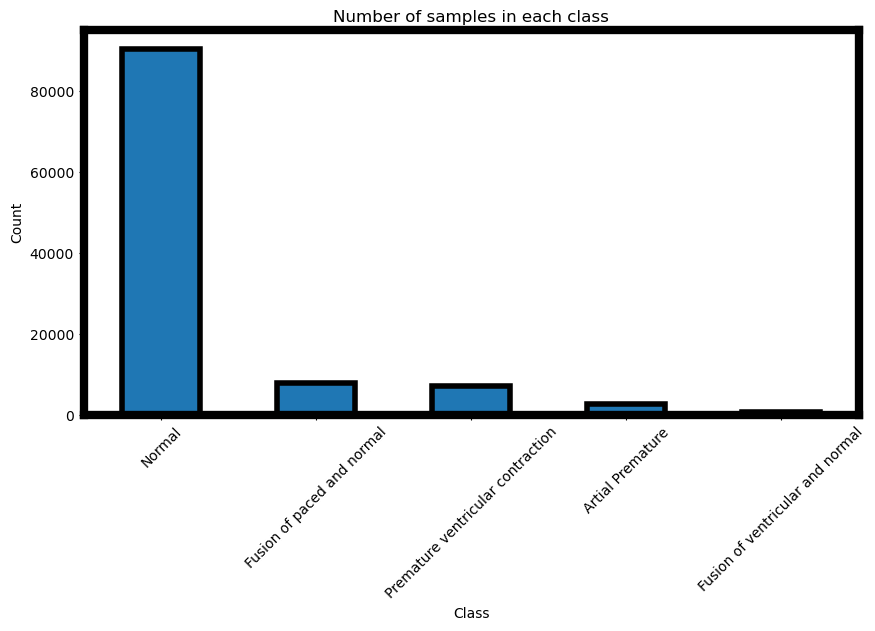

In [3]:
# %% Plotting classes with linewdiths 
counts = df_mitbih["label"].value_counts()
# Substitute the class names
counts.index = counts.index.map(id_to_label)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot a bar chart with black outlines
counts.plot(kind="bar", edgecolor='black', linewidth=4, ax=ax)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Set title and labels
plt.title("Number of samples in each class")
plt.xlabel("Class")
plt.ylabel("Count")

# Set axis linewidth
ax.spines['bottom'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
ax.spines['right'].set_linewidth(6)

# Show the plot
plt.show()

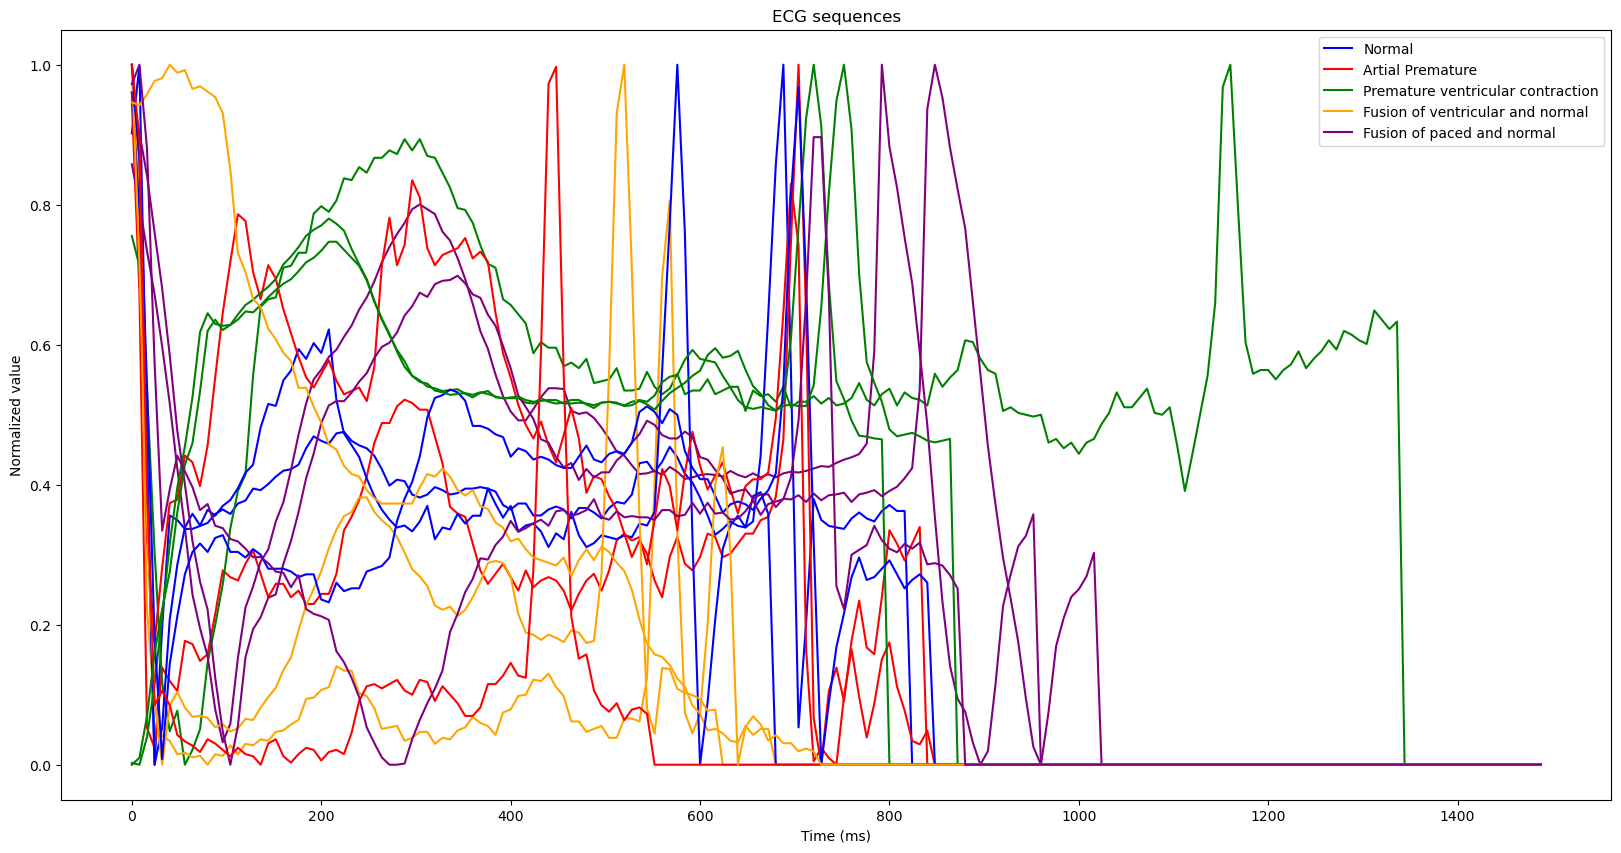

In [4]:
# %% Plotting example of healthy vs irregular heat beats
# create a figure
plt.figure(figsize = (20, 10))
# define colors for each class
colors = ["blue", "red", "green", "orange", "purple"]
# plot the normal sequences
for i in range(3):
    for label in id_to_label.keys():
        # sample a random sequence from that label
        df_mitbih_label = df_mitbih[df_mitbih["label"] == label].sample(1)
        # plot the sequence
        if i == 0:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label = id_to_label[label], color = colors[label])
        else:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], color = colors[label])
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [5]:
# %% Averages
averages = []
std = []
sem = []
lower_bound = []
upper_bound = []
for i in range(0,5):
    averages.append(df_mitbih[df_mitbih["label"] == i].mean(axis=0))
    std.append(df_mitbih[df_mitbih["label"] == i].std(axis=0))
    sem.append(df_mitbih[df_mitbih["label"] == i].std(axis=0) / np.sqrt(np.size(df_mitbih,axis=0)))
    lower_bound.append(averages[i] - sem[i])
    upper_bound.append(averages[i] + sem[i])

#print(averages.len())

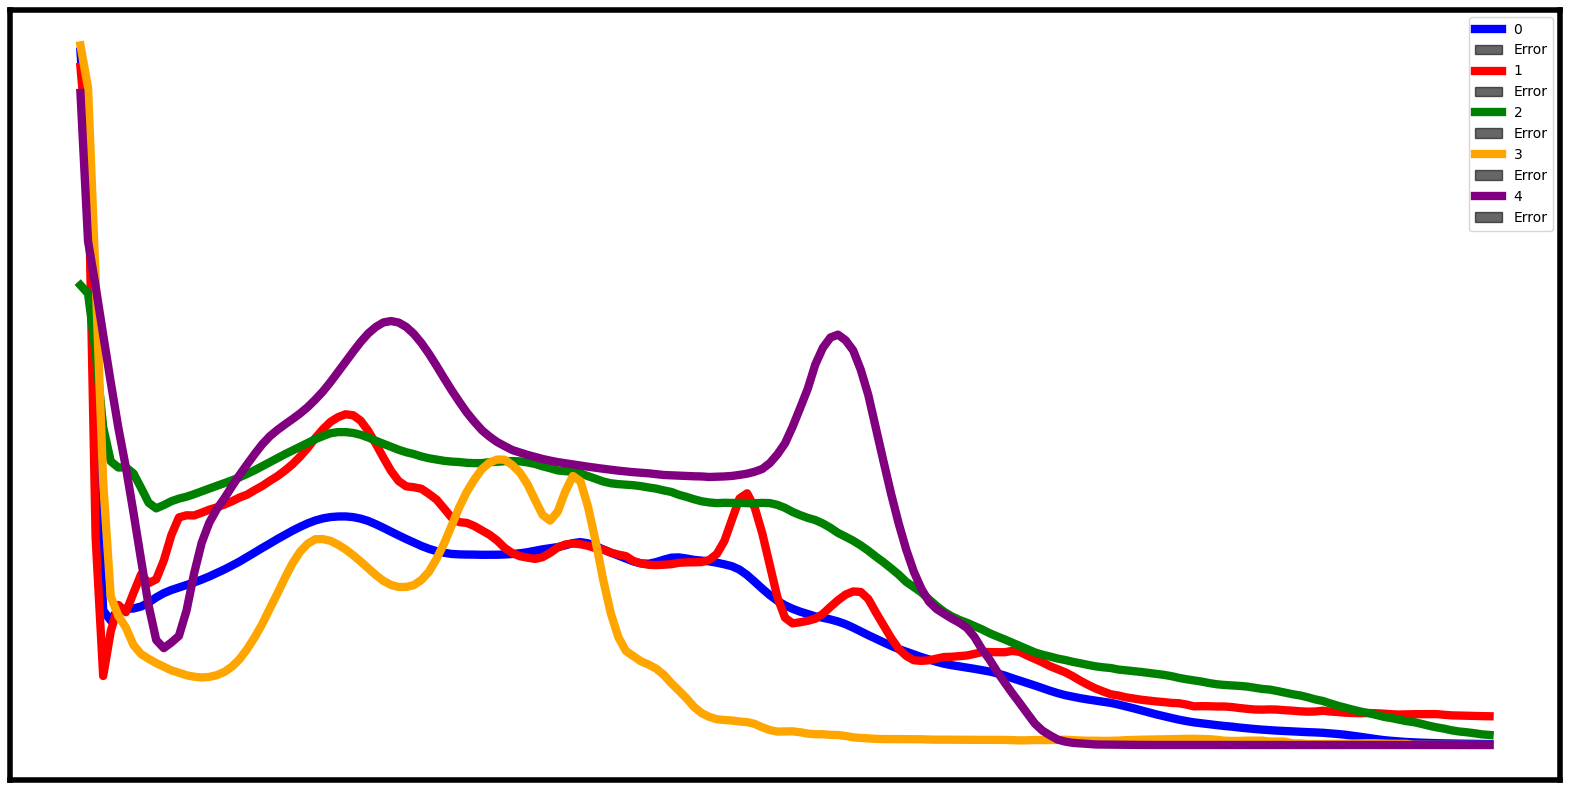

In [6]:
# %% Plotting average heart classes
#plt.plot(average[:-1], color=colors[1], label=list(id_to_label.keys())[i])
#plt.fill_between(df_mitbih_label.columns[:-1], lower_bound[1][:-1], upper_bound[1][:-1], color='gray', alpha=0.3, label='Error')
#plt.show()

plt.rcParams['axes.linewidth'] = 4
colors = ["blue", "red", "green", "orange", "purple"]
plt.figure(figsize=(20, 10))
for i, average in enumerate(averages):
    average = np.nan_to_num(average[:-1])  # Replace NaN or inf with 0
    lower = np.nan_to_num(lower_bound[i][:-1])
    upper = np.nan_to_num(upper_bound[i][:-1])
    plt.plot(average, color=colors[i], label=list(id_to_label.keys())[i], linewidth = 6)
    plt.fill_between(range(0,187), lower, upper, color='black', alpha=0.6, label='Error')

plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# %% Converting data from pandas to numpy 
X = df_mitbih.to_numpy()
XX = X[:,:-1]
y = X[:,-1]


# Random Forest

In [21]:
#%% Random Forest with Straified k - fold cross validation 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth= None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Set the number of cross-validation folds
k_folds = 10

# Create the stratified cross-validation object
stratified_kfold = StratifiedKFold(n_splits=k_folds)

# Perform cross-validation
scores = cross_val_score(rf_classifier, XX, y, cv=stratified_kfold,verbose=2)

# Print the accuracy for each fold
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score:.4f}")

RF_accuracies_skfold = scores
# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.4f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 6.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.3min remaining:    0.0s


[CV] END .................................................... total time= 6.2min
[CV] END .................................................... total time= 5.9min
[CV] END .................................................... total time= 6.0min
[CV] END .................................................... total time= 5.9min
[CV] END .................................................... total time= 5.8min
[CV] END .................................................... total time= 5.6min
[CV] END .................................................... total time= 5.7min
[CV] END .................................................... total time= 5.7min
[CV] END .................................................... total time= 5.7min
Fold 1: 0.9755
Fold 2: 0.9784
Fold 3: 0.9764
Fold 4: 0.9765
Fold 5: 0.9774
Fold 6: 0.9748
Fold 7: 0.9771
Fold 8: 0.9767
Fold 9: 0.9740
Fold 10: 0.9752
Mean Accuracy: 0.9762


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 58.8min finished


In [23]:
# %% Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth= None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9762448606669712


Confusion Matrix Random Forest:
[[18135     6    18     1     0]
 [  195   332     7     0     1]
 [  144     0  1249     6     3]
 [   51     0     6   101     0]
 [   77     0     5     0  1553]]


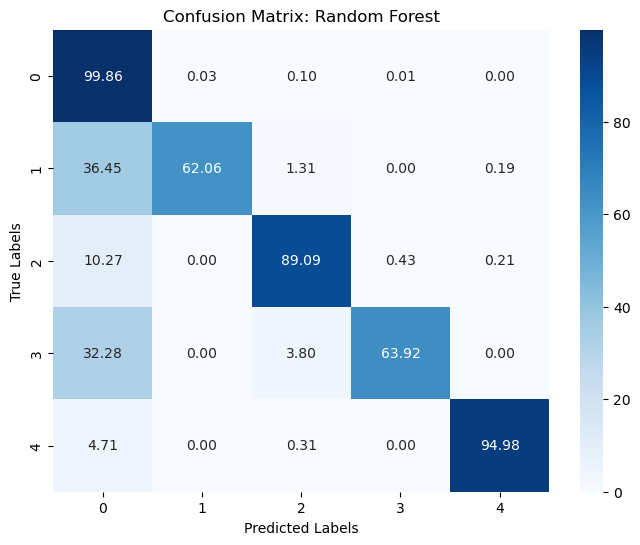

In [25]:
# %% Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Random Forest:")
print(cm)

cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent*100, annot=True, fmt="4.2f", cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# SVM

In [27]:
# %% SVM with straified k-hold
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Define the SVM model
svm_model = SVC(C=10, gamma='scale', kernel='rbf')

# Create stratified k-fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
accuracies = []
for train_index, test_index in kfold.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(test_index)

SVM_accuracies_skfold = accuracies
# Calculate and print the average accuracy across folds
avg_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy: {:.2f}%".format(avg_accuracy * 100))

[    18     28     29 ... 109439 109440 109441]
[     7     12     13 ... 109429 109430 109433]
[    11     44     45 ... 109407 109434 109445]
[     4     27     61 ... 109426 109435 109438]
[     8      9     10 ... 109391 109408 109444]
[     1      6     20 ... 109419 109424 109432]
[     0      3      5 ... 109420 109421 109423]
[    23     37     40 ... 109418 109425 109442]
[    21     35     36 ... 109414 109417 109437]
[     2     31     32 ... 109428 109436 109443]
Average Accuracy: 97.93%


Confusion Matrix:
[[18135     6    18     1     0]
 [  195   332     7     0     1]
 [  144     0  1249     6     3]
 [   51     0     6   101     0]
 [   77     0     5     0  1553]]


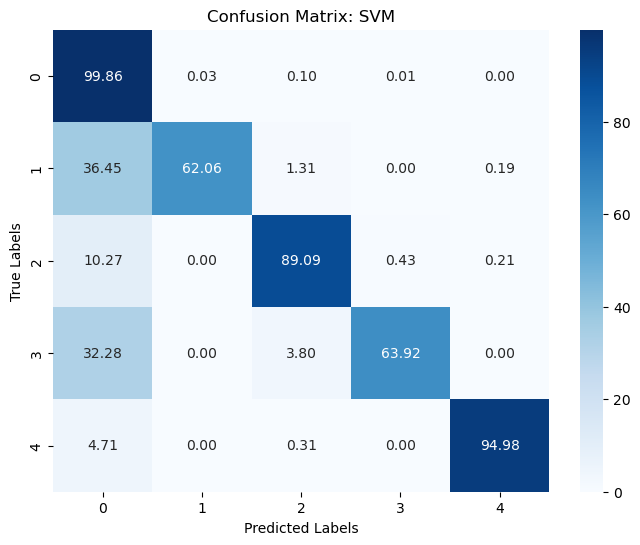

In [26]:
# %% Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent*100, annot=True, fmt="4.2f", cmap="Blues")
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# KNN

In [19]:
# %% KNN stratified cross-fold validation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
#from sklearn.datasets import load_iris

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='manhattan')

# Perform stratified cross-validation
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(knn, XX, y, cv=cv)
KNN_accuracies_Skfold = scores
#avg_accuracy = sum(scores) / len(scores)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.97880311 0.98063042 0.97624486 0.97715852 0.98108725 0.97752398
 0.97816155 0.97980629 0.97807018 0.97651681]
Mean score: 0.9784002974401513


Confusion Matrix:
[[9042    4    8    1    3]
 [  92  184    2    0    0]
 [  37    0  677    9    1]
 [  26    0    3   51    0]
 [  15    0    2    0  787]]


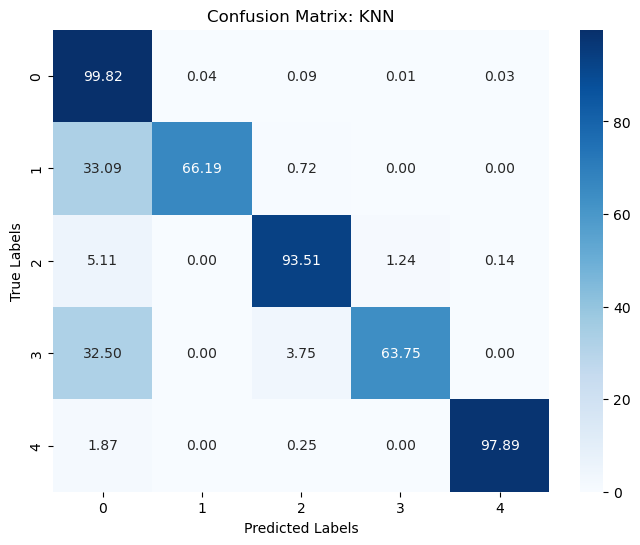

In [31]:
# %% Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent*100, annot=True, fmt="4.2f", cmap="Blues")
plt.title("Confusion Matrix: KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# GB Trees

In [ ]:
# %% Gradient boosted tree Grid search 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import load_iris


# Create a Gradient Boosted Tree classifier
gbdt = GradientBoostingClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150], #[50, 100, 150]
    'learning_rate': [0.1, 0.01, 0.001], #[0.1, 0.01, 0.001]
    'max_depth': [3, 4, 5] #[3, 4, 5]
}

# Perform stratified cross-validation with grid search
cv = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(gbdt, param_grid, cv=cv)
grid_search.fit(XX, y)

# Print the best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [8]:
# %% Gradient boosted tree with stratified cross-validiation 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a Gradient Boosted Tree classifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Perform stratified cross-validation
cv = StratifiedKFold(n_splits=2)
scores = cross_val_score(gbdt, XX, y, cv=cv, verbose=0)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.96299545 0.96242896]
Mean score: 0.9627122051057142


In [9]:
# %% Gradient Boosted Tree solo 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
#X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

# Create a gradient boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.963544997715852
